# Demo of multiclass accuracy methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from sklearn.metrics import confusion_matrix

## Make dummy prediction

In [2]:
# Use random integers ofor orginal
observed = np.random.randint(low=0, high=6, size=500)

# Add random Gaussian noise, convert to integers, and clip to 0-6
noise = np.random.normal(loc=0, scale=1, size=500)
predicted = observed + noise
predicted = predicted.astype(int).clip(0,6)

# Calculate error
error = observed - predicted

In [3]:
observed[1:10]

array([3, 2, 5, 1, 2, 0, 5, 0, 2])

In [4]:
predicted[1:10]

array([2, 1, 5, 2, 2, 0, 6, 0, 1])

In [5]:
error[1:10]

array([ 1,  1,  0, -1,  0,  0, -1,  0,  1])

## Show descriptive statistics of error

In [6]:
pd.Series(error).describe().round(2)

count    500.00
mean       0.38
std        0.98
min       -3.00
25%        0.00
50%        0.00
75%        1.00
max        4.00
dtype: float64

Show descriptive statistics of absolute error.

In [7]:
pd.Series(np.abs(error)).describe().round(2)

count    500.00
mean       0.75
std        0.73
min        0.00
25%        0.00
50%        1.00
75%        1.00
max        4.00
dtype: float64

## Show regression analysis

In [8]:
# Fit a regression line to the points
slope, intercept, r_value, p_value, std_err = \
    scipy.stats.linregress(predicted, observed)
r_square = r_value ** 2
y_pred = intercept + (observed * slope)

print (f'Intercept: {intercept:0.2f}')
print (f'Slope: {slope:0.2f}')
print (f'R-squared: {r_square:0.3f}')
print (f'P-value: {p_value:0.4f}')

Intercept: 0.80
Slope: 0.81
R-squared: 0.712
P-value: 0.0000


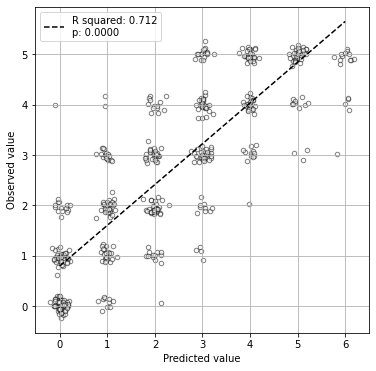

In [9]:
# Add jitter to points for plotting (clip to avoid overlap)
size = len(observed)
jitter = np.random.normal(loc=0, scale=0.1, size=size).clip(-0.45, 0.45)
x = predicted + jitter
jitter = np.random.normal(loc=0, scale=0.1, size=size).clip(-0.45, 0.45)
y = observed + jitter

# Calculate regression line
x_regression = np.arange(0, 7)
y_regression = (x_regression * slope) + intercept

fig = plt.figure(figsize=(6,6))
text = f'R squared: {r_square:.3f}\np: {p_value:0.4f}'
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, edgecolors='black', facecolor='w', alpha=0.5, marker='o', s=20)
ax1.plot(x_regression, y_regression, '--', color='k', label=text)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Predicted value')
ax1.set_ylabel('Observed value')
plt.show()


## Show confusion matrix

In [10]:
cm = confusion_matrix(observed, predicted)

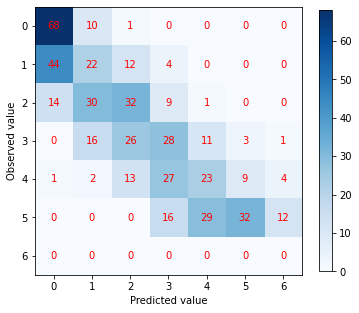

In [11]:
# Visualize the confusion matrix with colors
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
heatmap = plt.imshow(cm, cmap=plt.cm.Blues)
colorbar = plt.colorbar(heatmap, shrink=0.8)

# To add values to plot
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i][j], ha='center', va='center', color='r')

ax1.set_xlabel('Predicted value')
ax1.set_ylabel('Observed value')
plt.show()